<a href="https://colab.research.google.com/github/tazar09/situatii_financiare_2022/blob/main/sit_fin_2023%5B05oct%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

# Import coduri pentru impozite

In [ ]:
#Import cod impozit dataframe
url_cod = '/content/cod_impozit.xlsx'
lista_impozite = pd.read_excel(url_cod)
lista_impozite['COD_IMP'] = 'IMP' + lista_impozite['COD_IMP'].astype(str)
lista_impozite.head()

# Import situatii financiare anul 2022

In [ ]:
#Import situatii financiare dataframe
url_web_bl_bs_2022 = 'https://data.gov.ro/dataset/aa2567a4-e7d7-4e6e-ab19-d08d39f99996/resource/b35fab04-f101-42d7-a765-8f41728b373a/download/web_bl_bs_sl_an2022.txt'
df_base = pd.read_csv(url_web_bl_bs_2022, dtype = {'CUI':str, 'CAEN':str}, thousands = ',')

In [ ]:
df = df_base.copy()

In [ ]:
df.head()

,CUI,CAEN,I1,I2,I3,I4,I5,I6,I7,I8,...,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20
0,1758080,4931,16250707.0,12600287.0,922470.0,11449101.0,228716.0,650906.0,27949623,21426.0,...,210755.0,NaN,39213937.0,40326671.0,39905042.0,421629.0,0.0,274227.0,0.0,NaN
1,1770555,2899,4382308.0,13167071.0,6243032.0,3050034.0,3874005.0,25919.0,7307533,NaN,...,720.0,NaN,21480601.0,21616592.0,18740693.0,2875899.0,0.0,2486912.0,0.0,99.0
2,1772076,1431,3991824.0,13670457.0,9949344.0,2795638.0,925475.0,35908.0,6032140,486167.0,...,3990125.0,NaN,19048965.0,21765244.0,21733706.0,31538.0,0.0,31538.0,0.0,197.0
3,1774336,4941,21747409.0,12896215.0,10201046.0,1945071.0,750098.0,450.0,1258049,NaN,...,15000.0,NaN,16695296.0,13086584.0,11190142.0,1896442.0,0.0,1645894.0,0.0,19.0
4,2763904,1089,3186213.0,53223368.0,36399030.0,6481835.0,10342503.0,15708.0,23711439,NaN,...,17000000.0,NaN,42440258.0,43968685.0,40528519.0,3440166.0,0.0,3035703.0,0.0,46.0


# Formatare coloane main dataframe

## Import df coloane.

In [ ]:
#Import coloane dataframe
url_coloane_2022 = 'https://data.gov.ro/dataset/aa2567a4-e7d7-4e6e-ab19-d08d39f99996/resource/0079a6b0-0a5a-4be9-a26a-857449f41c25/download/web_bl_bs_sl_an2022.csv'
coloane = pd.read_csv(url_coloane_2022)

## Redenumire coloane.

In [ ]:
list_ind = list(coloane['CUI;CUI'])
list_ind.insert(0, 'CUI')
len(list_ind)

22

In [ ]:
df.columns = list_ind

In [ ]:
columns_names = list(df.columns)

In [ ]:
# Regex pattern
regex = r';i\d{1,2}$'

# Apply the regex pattern to the column names
new_column_names = []
for column_name in columns_names:
    new_column_name = re.sub(regex, '', column_name)
    new_column_names.append(new_column_name)

In [ ]:
df.columns = new_column_names
df.columns = df.columns.str.lower()

In [ ]:
df.columns = ['cui', 'caen', 'activ_total',
       'activ_circ', 'stocuri', 'creante',
       'casa_banci', 'chel_avans', 'datorii',
       'ven_avans', 'proviz', 'KP',
       'cap_subs_varsat', 'patrim_reg',
       'CA', 'ven_tot', 'chelt_tot',
       'prof_brut', 'pierd_bruta', 'prof_net', 'pierd_neta',
       'salar_med']

In [ ]:
df.head()

,cui,caen,activ_total,activ_circ,stocuri,creante,casa_banci,chel_avans,datorii,ven_avans,...,cap_subs_varsat,patrim_reg,CA,ven_tot,chelt_tot,prof_brut,pierd_bruta,prof_net,pierd_neta,salar_med
0,1758080,4931,16250707.0,12600287.0,922470.0,11449101.0,228716.0,650906.0,27949623,21426.0,...,210755.0,NaN,39213937.0,40326671.0,39905042.0,421629.0,0.0,274227.0,0.0,NaN
1,1770555,2899,4382308.0,13167071.0,6243032.0,3050034.0,3874005.0,25919.0,7307533,NaN,...,720.0,NaN,21480601.0,21616592.0,18740693.0,2875899.0,0.0,2486912.0,0.0,99.0
2,1772076,1431,3991824.0,13670457.0,9949344.0,2795638.0,925475.0,35908.0,6032140,486167.0,...,3990125.0,NaN,19048965.0,21765244.0,21733706.0,31538.0,0.0,31538.0,0.0,197.0
3,1774336,4941,21747409.0,12896215.0,10201046.0,1945071.0,750098.0,450.0,1258049,NaN,...,15000.0,NaN,16695296.0,13086584.0,11190142.0,1896442.0,0.0,1645894.0,0.0,19.0
4,2763904,1089,3186213.0,53223368.0,36399030.0,6481835.0,10342503.0,15708.0,23711439,NaN,...,17000000.0,NaN,42440258.0,43968685.0,40528519.0,3440166.0,0.0,3035703.0,0.0,46.0


# Import lista de platitori

In [ ]:
#Import lista platitori
url_platitori = '/content/date_identificar_platitori_2023_txt..txt'
lista_platitori_base = pd.read_csv(url_platitori, sep = '|', on_bad_lines='skip')

<ipython-input-17-da7d3b8487b1>:3: DtypeWarning: Columns (2,10,11,14,15,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  lista_platitori_base = pd.read_csv(url_platitori, sep = '|', on_bad_lines='skip', dtype = {})


In [ ]:
lista_platitori = lista_platitori_base.copy()

In [ ]:
lista_platitori.head(1)

,COD_FISCAL,DENUMIRE,COD_FISCAL_PARINTE,TIP_UNITATE,TIP_CONTRIB,LOCALITATE,STRADA,NR,DATA_INREGISTRARE,DATA_PRELUCRARE,...,IMP712,IMP713,IMP755,IMP756,IMP940,DETALII_ADRESA,BLOC,SCARA,ETAJ,AP
450.0,CONFLUX SA,NaN,Sediu central,PJ,Bucureşti,Str. SABINELOR,8,19/Jul/12,02/Jan/18 11:07:16 AM,3371515,...,NU,NU,NU,NU,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lista_platitori.reset_index(inplace = True)

In [ ]:
lista_platitori.columns = ['COD_FISCAL', 'DENUMIRE', 'COD_FISCAL_PARINTE', 'TIP_UNITATE',
       'TIP_CONTRIB', 'LOCALITATE', 'STRADA', 'NR', 'DATA_INREGISTRARE',
       'DATA_PRELUCRARE', 'FAX', 'SECTOR', 'TELEFON', 'JUDET_COMERT',
       'NR_COMERT', 'AN_COMERT', 'ACT_AUTORIZARE', 'TVA', 'DATA_RADIERE',
       'COD_POSTAL', 'DATA_STARE', 'STARE', 'JUDET', 'IMP100', 'IMP120',
       'IMP130', 'IMP160', 'ACCIZE200', 'CONT410', 'CONT412', 'CONT416',
       'CONT420', 'CONT423', 'CONT430', 'CONT432', 'IMP439', 'IMP451',
       'IMP461', 'IMP473', 'IMP474', 'CONT480', 'IMP500', 'IMP602', 'IMP611',
       'IMP625', 'IMP632', 'IMP633', 'IMP634', 'IMP701', 'IMP710', 'IMP711',
       'IMP712', 'IMP713', 'IMP755', 'IMP756', 'IMP940', 'DETALII_ADRESA',
       'BLOC', 'SCARA', 'ETAJ', 'AP', 'empty']

In [ ]:
lista_platitori.columns = lista_platitori.columns.str.lower()

In [ ]:
lista_platitori.head(3)

,cod_fiscal,denumire,cod_fiscal_parinte,tip_unitate,tip_contrib,localitate,strada,nr,data_inregistrare,data_prelucrare,...,imp713,imp755,imp756,imp940,detalii_adresa,bloc,scara,etaj,ap,empty
0,450.0,CONFLUX SA,NaN,Sediu central,PJ,Bucureşti,Str. SABINELOR,8,19/Jul/12,02/Jan/18 11:07:16 AM,...,NU,NU,NU,NU,NaN,NaN,NaN,NaN,NaN,NaN
1,949.0,SOCIETATEA DE CONSTRUCTII IN TRANSPORTURI BUCU...,NaN,Sediu central,PJ,Bucureşti,Str. OPANEZ,3A,25/Jan/23 11:15:33 AM,25/Jan/23 11:15:33 AM,...,NU,DA,NU,NU,NaN,NaN,NaN,NaN,NaN,NaN
2,3635.0,MULTICOM IODAN S.R.L.,NaN,Sediu central,PJ,BUCURESTI,Sos. PANTELIMON,358,13/Jan/23 5:04:36 PM,13/Jan/23 5:04:36 PM,...,NU,NU,NU,NU,NaN,15 ABC,NaN,NaN,NaN,NaN


In [ ]:
lista_platitori['cod_fiscal'] = lista_platitori['cod_fiscal'].astype(str)

## Selectie coloane din lista platitori.

In [ ]:
lista_platitori_short = lista_platitori[['cod_fiscal', 'denumire', 'imp100']]
lista_platitori_short.head(5)

,cod_fiscal,denumire,imp100
0,450.0,CONFLUX SA,DA
1,949.0,SOCIETATEA DE CONSTRUCTII IN TRANSPORTURI BUCU...,DA
2,3635.0,MULTICOM IODAN S.R.L.,DA
3,5750.0,RUSTA PROD COM SRL,DA
4,7963.0,COMPACT COM S.R.L.,DA


In [ ]:
lista_platitori_short.shape

(2337378, 3)

## Formatare coloane as str.

In [ ]:
lista_platitori_short = lista_platitori_short.dropna(axis = 0)

In [ ]:
lista_platitori_short['cod_fiscal'] = lista_platitori_short['cod_fiscal'].astype(float)

In [ ]:
lista_platitori_short['cod_fiscal'] = lista_platitori_short['cod_fiscal'].astype(int)

In [ ]:
lista_platitori_short['cod_fiscal'] = lista_platitori_short['cod_fiscal'].astype(str)

In [ ]:
lista_platitori_short.dtypes

In [ ]:
lista_platitori_short.isna().sum()

In [ ]:
lista_platitori_short = lista_platitori_short[lista_platitori_short['imp100'].str.contains('DA')]

In [ ]:
lista_platitori_short.rename(columns = {'cod_fiscal': 'cui'}, inplace = True)

In [ ]:
lista_platitori_short.head(2)

# Merging to main dataframe

In [ ]:
#Merging
df = df.merge(lista_platitori_short, on= 'cui', how = 'left')

In [ ]:
df= df[['cui', 'denumire','caen', 'activ_total', 'activ_circ', 'stocuri', 'creante',
       'casa_banci', 'chel_avans', 'datorii', 'ven_avans', 'proviz', 'KP',
       'cap_subs_varsat', 'patrim_reg', 'CA', 'ven_tot', 'chelt_tot',
       'prof_brut', 'pierd_bruta', 'prof_net', 'pierd_neta', 'salar_med']]

# Exporting the main dataframe

In [ ]:
# df.to_csv('platitori_profit_2022.csv', index=False)

# EDA

In [2]:
df = pd.read_csv('/content/platitori_profit_2022.csv')

In [3]:
df.head()

,cui,denumire,caen,activ_total,activ_circ,stocuri,creante,casa_banci,chel_avans,datorii,...,cap_subs_varsat,patrim_reg,CA,ven_tot,chelt_tot,prof_brut,pierd_bruta,prof_net,pierd_neta,salar_med
0,1758080,SOCIETATEA DE TRANSPORT PUBLIC S.A. ALBA IULIA,4931,16250707.0,12600287.0,922470.0,11449101.0,228716.0,650906.0,27949623.0,...,210755.0,NaN,39213937.0,40326671.0,39905042.0,421629.0,0.0,274227.0,0.0,NaN
1,1770555,DUPEX S.R.L.,2899,4382308.0,13167071.0,6243032.0,3050034.0,3874005.0,25919.0,7307533.0,...,720.0,NaN,21480601.0,21616592.0,18740693.0,2875899.0,0.0,2486912.0,0.0,99.0
2,1772076,CISEROM SA,1431,3991824.0,13670457.0,9949344.0,2795638.0,925475.0,35908.0,6032140.0,...,3990125.0,NaN,19048965.0,21765244.0,21733706.0,31538.0,0.0,31538.0,0.0,197.0
3,1774336,MADO SRL,4941,21747409.0,12896215.0,10201046.0,1945071.0,750098.0,450.0,1258049.0,...,15000.0,NaN,16695296.0,13086584.0,11190142.0,1896442.0,0.0,1645894.0,0.0,19.0
4,2763904,APIDAVA SRL,1089,3186213.0,53223368.0,36399030.0,6481835.0,10342503.0,15708.0,23711439.0,...,17000000.0,NaN,42440258.0,43968685.0,40528519.0,3440166.0,0.0,3035703.0,0.0,46.0


In [ ]:
df = df[df['CA'] > 1000]

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
df_short = df[['cui','denumire','caen', 'CA', 'pierd_bruta', 'pierd_neta', 'prof_brut', 'prof_net']]
mask = df_short['pierd_neta'] > 0
df_short[mask].head(10)

,cui,denumire,caen,CA,pierd_bruta,pierd_neta,prof_brut,prof_net
25,13854617,H.P.T. HUMBEL PRODUCTIONSTECHNIK S.R.L.,2562,30104295.0,2449510.0,2604506.0,0.0,0.0
58,31036845,MOLENT STRUCTURI SRL,2511,8664707.0,379598.0,379598.0,0.0,0.0
66,1678746,PHOENIX GROUP SRL,4673,409503.0,1101533.0,1101533.0,0.0,0.0
71,2758894,AGROINDIMPEX S.R.L.,4722,63179866.0,234970.0,241316.0,0.0,0.0
76,5183383,OST TRANSPORT SRL,4941,52207387.0,0.0,43052.0,44335.0,0.0
99,11071430,AGRO DEVELOPMENT SRL,147,45972995.0,6334496.0,6334496.0,0.0,0.0
104,12571280,CDM COMASTRAD S.R.L.,4211,29403250.0,4533649.0,4533649.0,0.0,0.0
110,13341468,ROYAL MOTORS SRL,4511,14350031.0,99672.0,107873.0,0.0,0.0
121,14549301,MGC INTERNATIONAL INVESTMENTS SRL,1039,21907059.0,2711178.0,2716284.0,0.0,0.0
138,17258315,DANBRED ARGES S.R.L.,146,7241470.0,1945485.0,2237286.0,0.0,0.0


In [ ]:
df_short['rentab_net'] = df_short['prof_net'] - df_short['pierd_neta']

<ipython-input-204-eadac99d7856>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['rentab_net'] = df_short['prof_net'] - df_short['pierd_neta']


In [ ]:
df_short['rentab_net_proc'] = round(df_short['rentab_net']/df_short['CA'],3)

<ipython-input-205-93c2a17fcdf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['rentab_net_proc'] = round(df_short['rentab_net']/df_short['CA'],3)


In [ ]:
df_short.shape[0]

64569

In [ ]:
mask_rentab = (df_short['rentab_net_proc'] > 0) & (df_short['rentab_net_proc'] < 0.1)
df_short = df_short[mask_rentab]

In [ ]:
df_short.sort_values('rentab_net_proc', ascending = False)

,cui,denumire,caen,CA,pierd_bruta,pierd_neta,prof_brut,prof_net,rentab_net,rentab_net_proc
58865,2776270,NaN,4729,58799.0,0.0,0.0,6383.0,5795.0,5795.0,0.099
39718,436272,TOTAL TRADING SRL,4669,8982440.0,0.0,0.0,1029417.0,885720.0,885720.0,0.099
22774,14606229,CONSTRUCTII FEROVIARE DRUMURI PODURI SRL,4213,14400065.0,0.0,0.0,1646083.0,1421008.0,1421008.0,0.099
41025,25720791,MOTECO GLASS FILIALĂ SRL,2312,8412080.0,0.0,0.0,1019385.0,833299.0,833299.0,0.099
40747,33880122,GRAM CONCEPT S.R.L.,8292,17386384.0,0.0,0.0,1990684.0,1719951.0,1719951.0,0.099
...,...,...,...,...,...,...,...,...,...,...
43329,2211098,IZA-Z.I S.R.L.,1624,606648.0,0.0,0.0,6972.0,906.0,906.0,0.001
20446,43361149,BUMBACELUL LAREI S.R.L.,1413,202218.0,0.0,0.0,752.0,199.0,199.0,0.001
58715,485,METALURGICA S.A.,2599,3946981.0,0.0,0.0,7301.0,3408.0,3408.0,0.001
43375,14527354,NaN,4613,35388.0,0.0,0.0,1100.0,39.0,39.0,0.001


<Axes: ylabel='Frequency'>

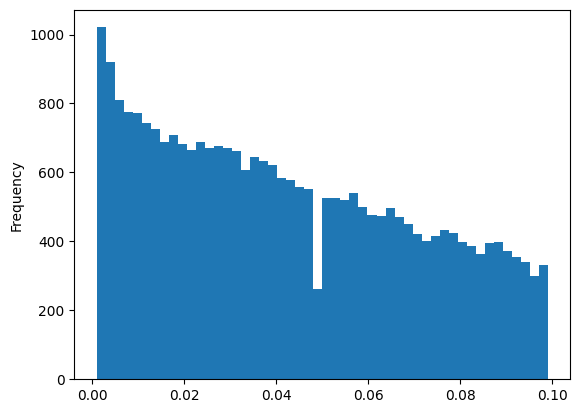

In [ ]:
df_short['rentab_net_proc'].plot(kind = 'hist', bins = 50)

In [ ]:
# column_mask = ['CUI', 'Cifra de afaceri neta;i13', 'DATORII;i7','Profitul brut;i16','Pierdere bruta;i17', 'Profitul net;i18', 'Pierdere neta;i19']
df.shape

(64569, 23)